# Assignment 07
Note:
For visualization, you have the freedom to choose one or many from
Matplotlib
Seaborn
Plotly Express
any other library
You can use the local Jupyter environment if you are not comfortable with Colab for this assignment.
Use use this notebook as your template and follow the instructions
The first half of this assignment is a repeat of assignment 05.

This gives you a chance to refresh.

The second half is new and gives you a chance to perform additional practices.

You also get a chance to use some of the Python libraries and techniques.

You will unzip the zip file manually in preparation for this assignment.

The links to the zip file is (you have already used it in your assignment 5):

https://data.ed.gov/dataset/college-scorecard-all-data-files-through-6-2020/resources (The page containing link to the zip file)

https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data_01192021.zip (The link to download the zip file)

After unzipping, You will have all files in one folder named "CollegeScorecard_Raw_Data"

The folder contains the yearly data files from 1996 to 2019 school years.

if you are using your local environment, I suggest you create a new folder call "Assignment7" and place the Notebook file and the data folder under it.  
   
   Assignment7/.  
    - assignment_07.ipynb.   
    - CollegeScorecard_Raw_Data/.   
        - ...  
        - 'MERGED1996_97_PP.csv',  
        - 'MERGED2015_16_PP.csv',  
        - ...  
        - 'MERGED2017_18_PP.csv'. 

In [74]:
# <1> 
# Import libraries

#(Write code here)

import pandas as pd
import os 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import glob



In [75]:

# <2> 
# Display the current workin directory using os.getcwd()
# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder

#(Write code here)

print(os.getcwd())
dir = r"/Users/koushikreddy974/Downloads/CollegeScorecard_Raw_Data"

/Users/koushikreddy974/Downloads


In [76]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder.
# use this method to assign the contents (list of file names) of the data folder to a variable and display it.
# # You can use ../ construct to traverse to the parent folder and then to another foloder parallel to the current folder

#(Write code here)
all_files  = os.listdir(dir)
print(all_files)

['MERGED2011_12_PP.csv', 'MERGED1999_00_PP.csv', 'MERGED2006_07_PP.csv', 'MERGED2014_15_PP.csv', 'Most-Recent-Cohorts-All-Data-Elements.csv', 'MERGED2003_04_PP.csv', 'MERGED1996_97_PP.csv', 'FieldOfStudyData1516_1617_PP.csv', 'Most-Recent-Cohorts-Field-of-Study.csv', 'MERGED2012_13_PP.csv', 'MERGED2005_06_PP.csv', 'MERGED2009_10_PP.csv', 'FieldOfStudyData1617_1718_PP.csv', 'MERGED2018_19_PP.csv', 'MERGED2017_18_PP.csv', 'Crosswalks.zip', 'MERGED2000_01_PP.csv', 'MERGED2001_02_PP.csv', 'MERGED2016_17_PP.csv', 'MERGED1997_98_PP.csv', 'MERGED1998_99_PP.csv', 'data.yaml', 'MERGED2004_05_PP.csv', 'MERGED2002_03_PP.csv', 'MERGED2015_16_PP.csv', 'MERGED2013_14_PP.csv', 'MERGED2007_08_PP.csv', 'MERGED2008_09_PP.csv', 'MERGED2010_11_PP.csv', 'FieldOfStudyData1415_1516_PP.csv']


In [77]:
# <4> 
# The folder contains files that are not the yearly data files
# write code to remove the unwanted files from the list vsriable 
# Note: don't remove/delete these files from the folder in your drive
# For example, use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# You can use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.

#(Write code here)
merged_files = [file for file in all_files if 'MERGED' in file]
print(merged_files)

['MERGED2011_12_PP.csv', 'MERGED1999_00_PP.csv', 'MERGED2006_07_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED2003_04_PP.csv', 'MERGED1996_97_PP.csv', 'MERGED2012_13_PP.csv', 'MERGED2005_06_PP.csv', 'MERGED2009_10_PP.csv', 'MERGED2018_19_PP.csv', 'MERGED2017_18_PP.csv', 'MERGED2000_01_PP.csv', 'MERGED2001_02_PP.csv', 'MERGED2016_17_PP.csv', 'MERGED1997_98_PP.csv', 'MERGED1998_99_PP.csv', 'MERGED2004_05_PP.csv', 'MERGED2002_03_PP.csv', 'MERGED2015_16_PP.csv', 'MERGED2013_14_PP.csv', 'MERGED2007_08_PP.csv', 'MERGED2008_09_PP.csv', 'MERGED2010_11_PP.csv']


In [28]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.

#(Write code here)
dir = r"/Users/koushikreddy974/Downloads/CollegeScorecard_Raw_Data/"
df1 = []
def read(file):
    df = pd.read_csv(dir+file,usecols=['UNITID','INSTNM','STABBR','REGION','ADM_RATE','TUITIONFEE_IN'])
    year = file.split('_')[0].replace('MERGED','')
    df['year'] = year
    df1.append(df)

for file in merged_files:
    read(file)

In [78]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

#(Write code here)
df2 = pd.concat(df1)
df2.info()
df2.head(6)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163331 entries, 0 to 7469
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UNITID         163331 non-null  int64  
 1   INSTNM         163331 non-null  object 
 2   STABBR         163331 non-null  object 
 3   REGION         163330 non-null  float64
 4   ADM_RATE       44912 non-null   float64
 5   TUITIONFEE_IN  79195 non-null   float64
 6   year           163331 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 10.0+ MB


,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
0,100654,Alabama A & M University,AL,5.0,0.5010,6828.0,2011
1,100663,University of Alabama at Birmingham,AL,5.0,0.7223,6264.0,2011
2,100690,Amridge University,AL,5.0,NaN,8720.0,2011
3,100706,University of Alabama in Huntsville,AL,5.0,0.6368,8094.0,2011
4,100724,Alabama State University,AL,5.0,0.5080,8082.0,2011
5,100751,The University of Alabama,AL,5.0,0.4353,8600.0,2011


In [79]:
df2.isnull()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
7465,False,False,False,False,True,False,False
7466,False,False,False,False,True,False,False
7467,False,False,False,False,True,False,False
7468,False,False,False,False,True,False,False


In [80]:
# <7>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

#(Write code here)
df_UMBC = df2[df2['INSTNM'] == 'University of Maryland-Baltimore County']


In [48]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

#(Write code here)
df_UMBC.info()
df_UMBC.isnull()
df_UMBC.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1694 to 1710
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         23 non-null     int64  
 1   INSTNM         23 non-null     object 
 2   STABBR         23 non-null     object 
 3   REGION         23 non-null     float64
 4   ADM_RATE       18 non-null     float64
 5   TUITIONFEE_IN  19 non-null     float64
 6   year           23 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.4+ KB


,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
1694,163268,University of Maryland-Baltimore County,MD,2.0,0.6081,9467.0,2011
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1799,163268,University of Maryland-Baltimore County,MD,2.0,0.7153,8622.0,2006
1610,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003


In [81]:
df_UMBC.isnull()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
1694,False,False,False,False,False,False,False
1955,False,False,False,False,True,True,False
1799,False,False,False,False,False,False,False
1610,False,False,False,False,False,False,False
1873,False,False,False,False,False,False,False
2151,False,False,False,False,True,True,False
1660,False,False,False,False,False,False,False
1819,False,False,False,False,False,False,False
1745,False,False,False,False,False,False,False
1415,False,False,False,False,False,False,False


<AxesSubplot:xlabel='year', ylabel='TUITIONFEE_IN'>

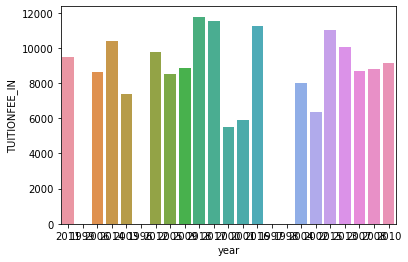

In [82]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart

#(Write code here)
sns.barplot(x='year',y='TUITIONFEE_IN',data=df_UMBC)

<AxesSubplot:xlabel='year', ylabel='TUITIONFEE_IN'>

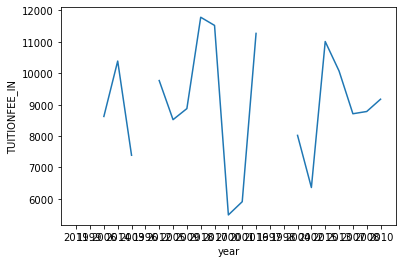

In [83]:
# <10> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart

#(Write code here)
sns.lineplot(x='year',y='TUITIONFEE_IN',data=df_UMBC)

In [84]:
# <11>
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List

#(Write code here)
tuition_change = df_UMBC['TUITIONFEE_IN'].tolist()

In [54]:
# Loop through the list and calculate the % change each year over the prior year
# This takes some effort. Not hard, just some abstract/logical thinking and some experiments
# Have fun on this one

 #(Write code here)
percent_change = [0]
for i in range(1,len(tuition_change)):
    difference = (tuition_change[i]-tuition_change[i-1])/tuition_change[i-1]
    percent_change.append(difference*100)
percent_change    

[0,
 nan,
 nan,
 20.43609371375551,
 -28.852080123266568,
 nan,
 nan,
 -12.74068004916018,
 4.131455399061033,
 32.75473399458972,
 -2.207505518763797,
 -52.33547490883834,
 7.650273224043716,
 90.5922165820643,
 nan,
 nan,
 nan,
 -20.67331670822943,
 72.99591323483182,
 -8.522624023260041,
 -13.50814461660707,
 0.8268259072117593,
 4.453302961275626]

In [86]:
# The resulting number has many decimal points which are unnecessary and not visually appealing.
# Round up the percentage to two decimal points
# You can use for loop. Or better, use list comprehension for simplicity/brevity

#(Write code here)
rounded_list = []
for i in percent_change:
        rounded_list.append(round(i,2))
rounded_list


[0,
 nan,
 nan,
 38.82,
 -38.95,
 nan,
 nan,
 -27.13,
 23.81,
 37.27,
 -2.92,
 -52.21,
 5.13,
 92.33,
 nan,
 nan,
 nan,
 -9.12,
 77.84,
 -6.65,
 -21.05,
 5.01,
 7.9]

In [103]:
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")
# Not as hard as you may think. If you get stuck, you think too hard. 
# Google it and you will find the answer.

#(Write code here)
df_UMBC['PCT_CHANGE'] = rounded_list
df_UMBC

<ipython-input-103-ce0e88aa471e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UMBC['PCT_CHANGE'] = rounded_list


,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year,PCT_CHANGE
1694,163268,University of Maryland-Baltimore County,MD,2.0,0.6081,9467.0,2011,0.00
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999,NaN
1799,163268,University of Maryland-Baltimore County,MD,2.0,0.7153,8622.0,2006,NaN
1610,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014,38.82
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003,-38.95
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996,NaN
1660,163268,University of Maryland-Baltimore County,MD,2.0,0.6035,9764.0,2012,NaN
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005,-27.13
1745,163268,University of Maryland-Baltimore County,MD,2.0,0.6890,8872.0,2009,23.81
1415,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018,37.27


<AxesSubplot:xlabel='year', ylabel='PCT_CHANGE'>

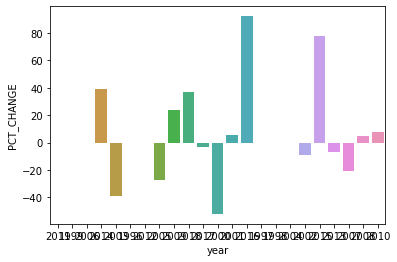

In [88]:
# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart

# (write code here)
sns.barplot(x='year',y='PCT_CHANGE', data=df_UMBC)

<AxesSubplot:xlabel='year', ylabel='PCT_CHANGE'>

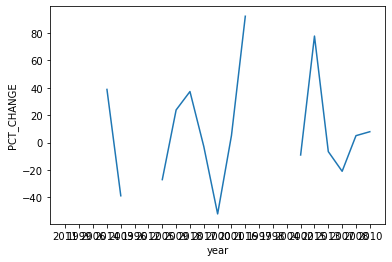

In [89]:
sns.lineplot(x='year',y='PCT_CHANGE', data=df_UMBC)

In [90]:
# <12>
# Since we want to do the same calculation for JHU. 
# Instead of doing it piecemeal as we did for UMBC
# Let's create a function which can be reused for any college.
# This function takes a list of tuitions and return a list of percentage changes year over year
# This function can be used later 

#(Write code here)
def percent_changed(tuition_change):
    percent_change = [0]
    for i in range(1,len(tuition_change)):
        difference = (tuition_change[i]-tuition_change[i-1])/tuition_change[i-1]
        percent_change.append(difference*100)
    rounded_list = []
    for i in percent_change:
        rounded_list.append(round(i,2))
    return rounded_list

In [91]:

# <13>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

#(Write code here)
df_JHU = df2[df2['INSTNM']=='Johns Hopkins University']
df_JHU.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1687 to 1703
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         23 non-null     int64  
 1   INSTNM         23 non-null     object 
 2   STABBR         23 non-null     object 
 3   REGION         23 non-null     float64
 4   ADM_RATE       18 non-null     float64
 5   TUITIONFEE_IN  19 non-null     float64
 6   year           23 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.4+ KB


<AxesSubplot:xlabel='year', ylabel='TUITIONFEE_IN'>

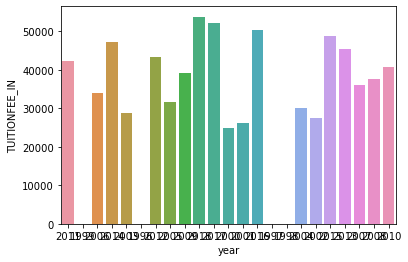

In [92]:
# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together

#(Write code here)
sns.barplot(x='year',y='TUITIONFEE_IN',data=df_JHU)

<AxesSubplot:xlabel='year', ylabel='TUITIONFEE_IN'>

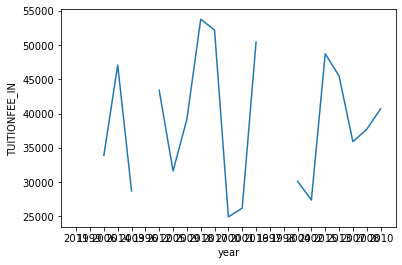

In [93]:
sns.lineplot(x='year',y='TUITIONFEE_IN',data=df_JHU)

In [94]:
# <15>
# Let's calculate the JHU tuition percentge growth using the function defined earlier

#(Write code here)
tuition_change = df_JHU['TUITIONFEE_IN'].tolist()
percent_change = percent_changed(tuition_change)

In [95]:
# <16>
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

#(Write code here)
df_JHU['PCT_CHANGE'] = percent_change

<ipython-input-95-70492d49e059>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_JHU['PCT_CHANGE'] = percent_change


<AxesSubplot:xlabel='year', ylabel='PCT_CHANGE'>

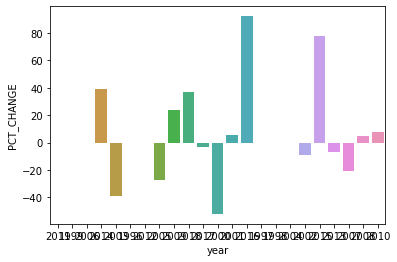

In [96]:
# <17> Make a bar plot of the JHU percentage changes tuitions over time

#(Write code here)
sns.barplot(x='year',y='PCT_CHANGE',data=df_JHU)

<AxesSubplot:xlabel='year', ylabel='PCT_CHANGE'>

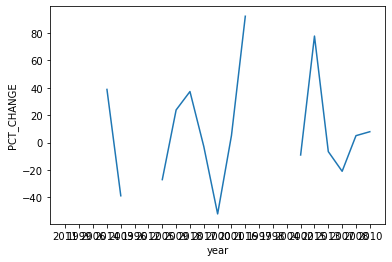

In [97]:
sns.lineplot(x='year',y='PCT_CHANGE',data=df_JHU)

In [98]:
# <18>
# In order to plot both UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
# Feel free to try it without changing the column names.

#(Write code here)
umbc2 = df_UMBC[['year']]
umbc2['UMBC_PCT'] = df_UMBC['PCT_CHANGE']
umbc2

<ipython-input-98-f752da8d8b61>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umbc2['UMBC_PCT'] = df_UMBC['PCT_CHANGE']


,year,UMBC_PCT
1694,2011,0.00
1955,1999,NaN
1799,2006,NaN
1610,2014,38.82
1873,2003,-38.95
2151,1996,NaN
1660,2012,NaN
1819,2005,-27.13
1745,2009,23.81
1415,2018,37.27


In [99]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

#(Write code here)
jhu2 = df_JHU[['year']]
jhu2['JHU_PCT'] = df_JHU['PCT_CHANGE']
jhu2

<ipython-input-99-e01717e7d37d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jhu2['JHU_PCT'] = df_JHU['PCT_CHANGE']


,year,JHU_PCT
1687,2011,0.00
1946,1999,NaN
1792,2006,NaN
1603,2014,38.82
1865,2003,-38.95
2139,1996,NaN
1653,2012,NaN
1812,2005,-27.13
1738,2009,23.81
1410,2018,37.27


In [100]:
# Now, merger the two data frames
# and display the new dataframe

#(Write code here)
merged_dfs = pd.merge(umbc2,jhu2)
merged_dfs.head()

,year,UMBC_PCT,JHU_PCT
0,2011,0.00,0.00
1,1999,NaN,NaN
2,2006,NaN,NaN
3,2014,38.82,38.82
4,2003,-38.95,-38.95


<AxesSubplot:xlabel='year'>

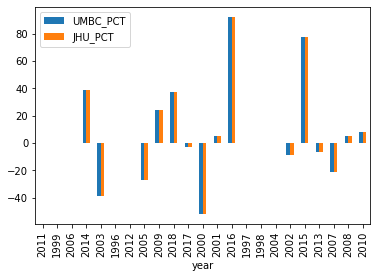

In [101]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

#(Write code here)
merged_dfs.plot.bar(x='year',y=["UMBC_PCT","JHU_PCT"])

<AxesSubplot:xlabel='year'>

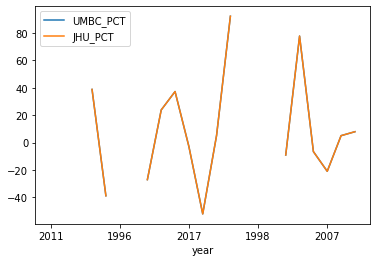

In [102]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

#(Write code here)
merged_dfs.plot.line(x='year',y=["UMBC_PCT","JHU_PCT"])

In [ ]:
# <19> 
# document your observation/conclusion of the comparison plots (bar/line)
# use the following Markdown cell


Based on the plots, it can be observed that there has been a drastic change in the tution fees of the students in UMBC over the years. Sometimes it has seen a steep increase in the fees and the very next years it has also seen a steep decline in the fee.  
On the other hand, JHU hasn't shown that much of a drastic change in the tution fees but there is noticeable amount of increase and decrease in the fees overs the years.
  